In [1]:
import os
import json
# change to results folder
os.environ['nnUNet_results'] = f'/home/nathan/segmentation_generator/'
os.environ['nnUNet_preprocessed'] = 'none'
os.environ['nnUNet_raw'] = 'none'

from nnunetv2.inference.predict_from_raw_data import predict_entry_point, predict_using_numpy

In [2]:
# load properties (can be an empty json file)
with open('properties.json', 'r') as f:
    properties = json.load(f)

In [8]:
import SimpleITK as sitk
import numpy as np
# replace with 2d images
input = sitk.GetArrayFromImage(sitk.ReadImage("/raid/dataset/nnUNet_raw/Dataset022_COPD_addedArt/imagesTr/26173V_16_2_data_0000.nii.gz"))
true_mask = sitk.GetArrayFromImage(sitk.ReadImage("/raid/dataset/nnUNet_raw/Dataset022_COPD_addedArt/labelsTr/26173V_16_2_data.nii.gz"))
image_1 = np.expand_dims(input, axis=0)
# testing with images of different sizes
image_2 = sitk.GetArrayFromImage(sitk.ReadImage("/raid/dataset/nnUNet_raw/Dataset022_COPD_addedArt/imagesTr/26159B_4_2_data_0000.nii.gz"))
true_mask_2 = sitk.GetArrayFromImage(sitk.ReadImage("/raid/dataset/nnUNet_raw/Dataset022_COPD_addedArt/labelsTr/26159B_4_2_data.nii.gz"))
image_2 = np.expand_dims(image_2, axis=0)
input = [image_1, image_2]

#change checkpoint name
checkpoint_name = "checkpoint_best_2d_4DCT_only_1"

predictor = predict_using_numpy(input, '024', properties, c='2d', npp=2, nps=1, f = [0], chk = checkpoint_name)

In [9]:
# grab masks
masks = predictor.grab_masks()

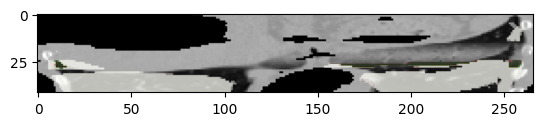

(1, 42, 191, 265)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image_2[0][:, 100, :], cmap='gray', )
plt.imshow(masks[1][:, 100, :], cmap='Reds', alpha=masks[0][:, 100, :]*.5)
plt.imshow(true_mask_2[:, 100, :], cmap='Greens', alpha=true_mask[:, 100, :]*.5)
plt.show()
print(image_1.shape)